### <p style="text-align: right;"> &#9989; Elizabeth Walter</p>

# Day 14: In-class Assignment: Modeling with ODEs

<img src="https://static.vecteezy.com/system/resources/previews/000/155/797/non_2x/vector-bungee-jumper-falling-in-fear.jpg" width= 400><p style="text-align: right;">
</p>

### Goals for Today's In-Class Assignment
By the end of this assignment, you should be able to:
* Use functions to define derivatives that model the evolution of a physical system.
* Use loops to update the state of an evolving system.
* Use `solve_ivp` to model a physical system
* Use <code>matplotlib</code> to plot the evolution of the system.
* Use NumPy when necessary to manipulate arrays or perform mathematical operations
* Compare the differences between different numerical solutions to ODEs

### Assignment instructions

Today, **with your group**, you're going to try to apply what you've learned in the pre-class assignment to solve ODEs to model a physical system.

**This assignment is due at the end of class** and should be uploaded into the appropriate "In-class Assignments" submission folder.  Submission instructions can be found at the end of the notebook.

---
## Review from Preclass

For reference, here are the differential equations of motion we used for the skydiver in the pre-class assignment:

We know that the **change in height** over some **change in time** is the **velocity** of the sky-diver, which we can write as:

$$ \frac{dh}{dt} = v$$

where we can think of **dh** as some small change in the height and **dt** is some small change in time. 

Similarly, a **change in velocity** over **change in time** is the **acceleration**, which we can write as:

$$ \frac{dv}{dt} = a$$

Now, if we combine these equations with the **initial conditions** of the skydiver, we have what is often referred to as an **initial value problem**.

If we want to solve this system **numerically**, one way that we can do it is to use a set of **"update equations"**, that allow us to move the skydiver from one point in time to another. The simplest set of update equations we can use are the following:

$$h_{\mathrm{new}} = h_{\mathrm{old}} + \frac{dh}{dt}\Delta t$$

$$v_{\mathrm{new}} = v_{\mathrm{old}} + \frac{dv}{dt}\Delta t$$

and since we know that $\frac{dh}{dt} = v$ and $\frac{dv}{dt} = a$, we can also write these equations this way:

$$h_{\mathrm{new}} = h_{\mathrm{old}} + v~\Delta t$$

$$v_{\mathrm{new}} = v_{\mathrm{old}} + a~\Delta t$$

You should also remember that the acceleration at any moment in time is the sum of all of the individual accelerations, which in the case of the skydiver looked something like this:

$$a_{\mathrm{total}} = a_{\mathrm{gravity}} + a_{\mathrm{air}}$$

---
# Modeling a bungee jumper

Building off of what you learned in your pre-class assignment, you're going to try modeling the motion of a bungee jumper with and without air resistance. There is a lot of detail included in this section to try to make sure you have all the information you need to evolve the system, so make sure you read through it in detail.

For those of you who might not be familiar with Bungee Jumping, here's the Wikipedia explanation:
 
 > Bungee jumping is an activity that involves jumping from a tall structure while connected to a large elastic cord. The tall structure is usually a fixed object, such as a building, bridge or crane; but it is also possible to jump from a movable object, such as a hot-air-balloon or helicopter, that has the ability to hover above the ground. The thrill comes from the free-falling and the rebound. When the person jumps, the cord stretches and the jumper flies upwards again as the cord recoils, and continues to oscillate up and down until all the kinetic energy is dissipated.
 
The first case of modern bungee jumping occurred in 1979 and this extreme sport parallels sky-diving in many ways. Given this, we're going to build off of your experience with modeling the sky-diver to model the bungee jumper. One thing to note is that while both sky-diving and bungee jumping involve someone being in freefall, the bungee jumper model is complicated by the addition of the bungee cord (which is very good for the bungee jumper!).

In the bungee jumping model, the cord itself acts as a spring, which provides the restoring force necessary for the bungee jumper to travel back upward once it reaches the bottom of the jump. This force is defined by **Hooke's Law**, which states that force from a spring is:

$$F_{\mathrm{spring}} = -k~d$$

where $k$ is the spring constant and $d$ is the displacement, or distance, from the spring's normal resting position. In other words:

* **The displacement, $d$, is defined to be $d = l - l_{\mathrm{unstretched}}$**, where $l_{\mathrm{unstretched}}$ is the natural length of the spring when it is neither stretched or compressed.

Using the equation for force, this means the acceleration applied by the spring is:

$$a_{\mathrm{spring}} = \frac{-k~d}{m}$$

where, in the case of the bungee jumper, this uses the mass, $m$, of the jumper themself.

For this problem, use the following values for these new constants:

* **Spring constant**, **$k = 6.0$**
* **Natural length (neither stretched or compressed) of the bungee cord/spring**, $l_{\mathrm{unstretched}} = 30.0$ m. 

**Important Note:** In reality, a bungee cord never pushes the jumper downward, but we're going to make the assumption that the bungee cord acts like a rigid spring to simplify the problem. So, in our model, when the jumper is at the top of the jump they feel a force downward due to fact that the "spring" is in a compressed state. Any time you compute an acceleration, you'll want to make sure you include the acceleration,$a_{\mathrm{spring}}$, due to Hooke's Law.

You're going to model the **length**, $l$, of the bungee cord (not the height of the bungee jumper) for a total of 60 seconds and assume the bungee jumper dives head first with a projected area, $A$, of 0.1 m$^2$ and has a mass, $m$, of 80 kg.

Also, to start the problem, you should assume that **$l=0$ and that this represents the time when the bungee jumper is at their highest point (right before they jump)**.



---
## Solving the ODEs using update equations

For your first solution, you're going to model the motion of the bungee jumper *using loops and update equations*. 

**Note**: When modeling the length of the bungee cord, gravity acts to extend the cord, so the acceleration due to gravity should be considered a **positive value**, which is different than the skydiver problem.

**Try modeling the solution both with and without air resistance and see how the results change.**

For the case of no air resistance, you'll get a solution that models what is referred to as a "simple harmonic oscillator". When you include air resistance, you get a "damped harmonic oscillator."

A **solution for the skydiver model using update equations** from the pre-class assignment is included at the end of this notebook if you would like to use it as a reference or as the foundation for your new code.

&#9989;&nbsp; **WRITE out your model (system of equations) in your own words and equations before your start. Specifically, what are your key variables?     What is your model for $l$, $v$, $a$?     How do these change with time?   Check in with your group members to compare your plan.**

<font size="+3">&#9998;</font> _Put the pseudocode for your model here; Basically discuss your key variables; Basic equations; Steps to solve this problem_
- import modules
- initialize variables and define parameters: k, d, l, a, A, m, tmax, v
- things that will change w/time - velocity, length, acceleration, time
- initialize lists

---
&#9989;&nbsp; Once you have a plan, **write code using *using loops and update equations***.  You should make a plot of the bungee cord length and the velocity as a function of time. As a starting point, use **0.1 seconds** as your initial time step size.


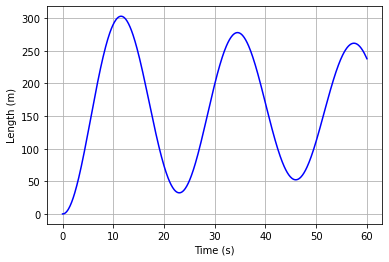

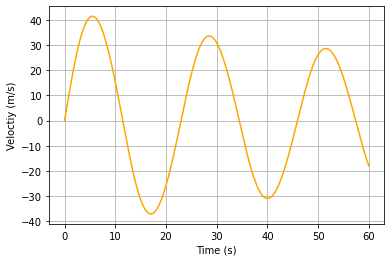

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#initialize variables

k = 6 # spring constant
l_unstretched = 30 #m - natural length of bungee cord
A_jumper = .1 # m^2 - area of bungee jumper
m = 80 # kg - mass of jumper
tmax = 60 # s - total amt of time for model
g = 9.8 # m/s^2 - a_gravity
l = 0 # (initial) length
v = 0 # initial velocity
t = 0 # s - initial time
a_total = 0 # m/s^2 - initial total acceleration
dt = 0.1 #timestep

# initialize lists

length = []
velocity = []
acceleration = []
time = []

#append initial values to lists
length.append(l)
velocity.append(v)
acceleration.append(a_total)
time.append(t)

# Creat derivatives function for length and velocity
def derivs(l,v):
    d = l - l_unstretched
    a_spring = (-1 * k * d) / m
    a_air = (-0.65 * A_jumper * v * abs(v)) / m
    a_total = g + a_spring + a_air
    
    #derivative length = velocity (ch distance over ch time)
    dldt = v
    #derivative velocity = acceleration
    dvdt = a_total
    return dldt, dvdt
    
#loop for t until tmax
while t <= tmax:
    #compute derivatives for update equations
    dldt, dvdt = derivs(l,v)
    #update equations
    l_new = l + dldt*dt
    v_new = v + dvdt*dt
    #append values to l and v lists
    length.append(l_new)
    velocity.append(v_new)
    #update old l/v w new values
    l = l_new
    v = v_new
    
    #incr time
    t = t + dt
    #update time list
    time.append(t)

#plot both against time
plt.figure(1)
plt.plot(time, length, color = 'blue')
plt.xlabel('Time (s)')
plt.ylabel('Length (m)')
plt.grid()

plt.figure(2)
plt.plot(time, velocity, color = 'orange')
plt.xlabel('Time (s)')
plt.ylabel('Veloctiy (m/s)')
plt.grid()

When successful, your plots with no air resistance (the undamped oscillator) should look something like this.  

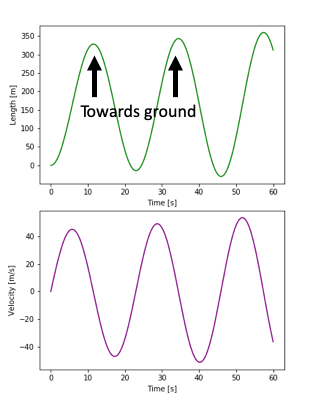

&#9989;&nbsp; **Question**: Do your results make sense? How does adding air resistance change the results?  If the bungee jumper jumps from a bridge that is 200 meters above the ground, will they survive the jump?

<font size=+3>&#9998;</font> 
- The results make more sense once air resistance is added because in reality the initial fall stretches the cord the longest and then it bounces just a few times before the cord stops stretching and velocity reaches 0. Before adding it, the length that the cord was being stretched to and the velocity were increasing with each bounce.
- They would absolutely die.

---
## Solving the ODEs using solve_ivp

Above, you performed numerical update equations to solve for length and velocity. For your second solution, you're going to model the motion of the bungee jumper using `solve_ivp`, a flexible python solution for these types of problems (systems modeled with 1st order differential equations).

The basic anatomy for the use of `solve_ivp` can be seen here:

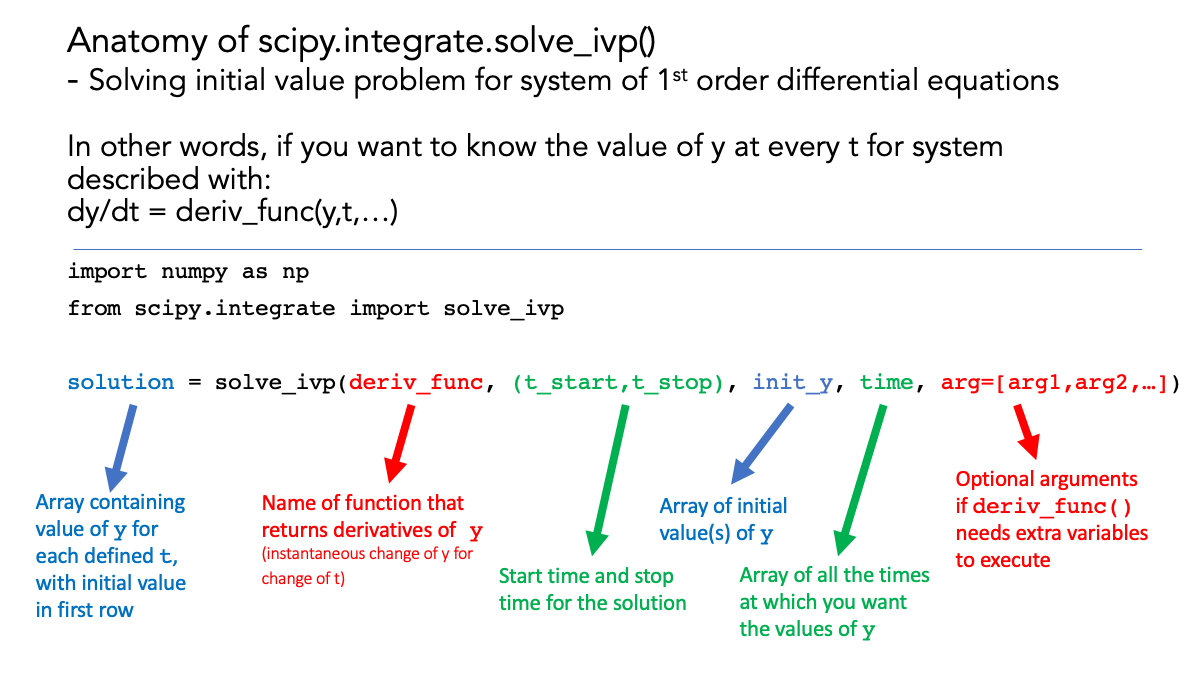

&#9989;&nbsp; **Once you have a working model, you should make a plot of the bungee cord length and the velocity as a function of time**.

**Note**: You should be able to use what you figured out from the update equation solution to help guide your `solve_ivp` solution.

**As before, try modeling the solution both with an without air resistance and see how the results change.**

**An `solve_ivp` solution for skydiver model from the pre-class assignment is included at the end of this notebook if you would like to use it as a reference or as the foundation for your new code.**

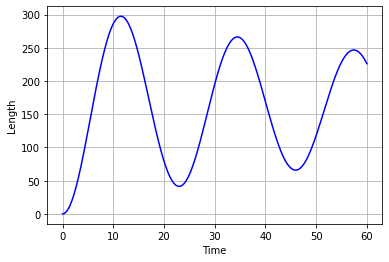

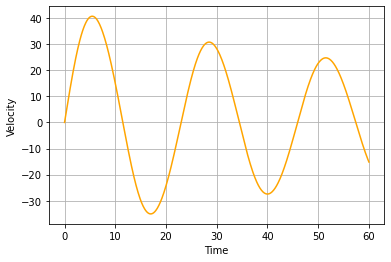

In [12]:
from scipy.integrate import solve_ivp
# already initialized variables but have to repeat some inside the new derivative function
# need to repeat initial values for l and v bc due to above cell they no longer = 0


def derivs(time,cv): #MUST be set up like this for solve_ivp to work
    # declare parameters - constants in function - need to be repeated so they're INSIDE the function
    k = 6
    l_unstretched = 30 #m
    A_jumper = 0.1 # m^2
    m = 80 # kg
    g = 9.8 # m/s^2

    # unpack current values of variables we want to update in our update eq's
    l, v = cv # 'cv' is a list with the values we are evaluating & need the derivatives of

    d = l - l_unstretched # need these for calculating total acceleration, 
    a_spring = (-1 * k * d) / m #i think they HAVe to be inside the function to work, 
    a_air = (-0.65 * A_jumper * v * abs(v)) / m #and i put them here bc I cant define d before i define l but idk if it otherwise matters
    a_total = g + a_spring + a_air 
    
    dldt = v
    dvdt =  a_total
    return dldt, dvdt

# inital conditions for variables
l_in = 0 # initial length
v_in = 0 # initial velocity
a_total = 0 # m/s^2 - initial total acceleration
dt = 0.1 #timestep
tmax = 60 # s

# Create an array for time
time = np.arange(0, tmax + dt, dt)

#create list w initial values
in_vals = [l_in, v_in]

ode_answer = solve_ivp(derivs,(0,tmax),in_vals,t_eval = time)

# variable values from ode_answer
l = ode_answer.y[0,:]
v = ode_answer.y[1,:]
t = ode_answer.t

# plot for l
plt.figure(1)
plt.plot(time, ode_answer.y[0,:],color="blue") #bunch object notation. [index of l, get all values of l]
plt.xlabel('Time')
plt.ylabel('Length')
plt.grid()

#plot for v
plt.figure(2)
plt.plot(time, ode_answer.y[1,:],color='orange') # [index of v, give all values of v]
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.grid()

---
## Comparing your solutions

Now that you have functional solutions using both the update equations and `solve_ivp`, you should compare your results from the two different methods.

&#9989;&nbsp; **In the same plot, plot the position as a function of time from both your update equation solution and your `solve_ivp` solution. Make a separate plot for both velocity solutions as well.**

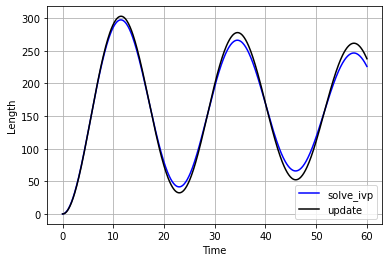

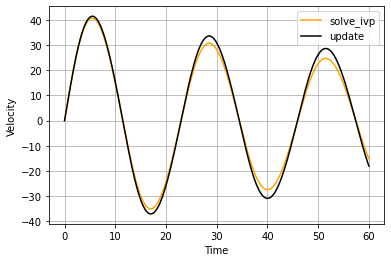

In [13]:
# plot for l
plt.figure(1)
plt.plot(time, ode_answer.y[0,:],color="blue", label = 'solve_ivp') #l from solve_ivp
plt.plot(time, length, color = 'black', label = 'update') #l from loop/update equation method
plt.xlabel('Time')
plt.ylabel('Length')
plt.grid()
plt.legend()

#plot for v
plt.figure(2)
plt.plot(time, ode_answer.y[1,:],color='orange', label = 'solve_ivp') #v from solve_ivp
plt.plot(time, velocity, color = 'black', label = 'update') #v from loop/update eq method
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.grid()
plt.legend()

&#9989;&nbsp; **Question**: Do the results from your two different methods agree? If they don't, how do they differ? What happens as you change the size of the timesteps? How do the solutions compare when you go to larger time steps? smaller time steps?

<font size=+3>&#9998;</font> 
- Whenever I try to change the size of the timestep, bigger or smaller, I get a ValueError saying that the shape of y is 1 + the shape of x and cannot figure out why. 
- I can assume however that the smaller the timestep, the more accurate the values will be, and the more the plots for each method will line up with each other. 

&#9989;&nbsp; **Question**: Which of the two methods for modeling this system do you prefer? Which one felt like more work to get working? For the one that required more work, were there benefits to doing that work or drawbacks? Leave your responses in the cell below.

<font size=+3>&#9998;</font> The solve_ivp method felt like more work bc its less familiar, but did most of the work upfront for the first method, so hard to say.

---


### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload it there.

---
---
# Example solutions to the skydiver problem
---
## Solution to the skydiver problem using update equations

The following code provides a solution to the skydiver problem using update equations for the case when air resistance is included.

In [ ]:
# Import modules
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize variables
h = 2000 # initial height; m
v = 0 # initial velocity; m/s 
g = -9.81 # gravity; m/s^2
t = 0 # initial time
tmax = 30 # Falling time
dt = 0.1 # timestep

# Initialize lists for storing data
height = []
velocity = []
time = []
acceleration = []

# Append initial values to lists
height.append(h)
velocity.append(v)
time.append(t)
acceleration.append(g)

# Create a function to compute derivaives of velocity and height
def derivs(v,g):
    # Define some variables for the air resistance
    A = 0.4 # m^2
    m = 80.0 # kg
    
    # derivative of height is velocity
    dhdt = v
    
    # derivative of velocity is acceleration (gravity in this e.g.)
    dvdt = g + (-0.65 * A * v * abs(v))/m
    
    return dhdt, dvdt

# Create a time loop that will update the skydiver over time
# Use a while loop that will loop until t > tmax
while t <= tmax:
    
    # Compute derivatives for use in update equations
    dhdt, dvdt = derivs(v,g)
    
    # Update Equations
    h_new = h + dhdt*dt # new height
    
    v_new = v + dvdt*dt # new velocity
    
    # Append values to height and velocity lists
    height.append(h_new)
    velocity.append(v_new)
    acceleration.append(dvdt)
    
    # Update old height/velocity with new height
    h = h_new
    v = v_new
    
    # Increase time
    t += dt # t = t + dt
    
    # Update time list
    time.append(t)
    
# Plotting height/velocity/acceleration vs time 
plt.figure(1)
plt.plot(time, height, color = 'green')
plt.xlabel('Time [seconds]')
plt.ylabel('Height [meters]')
plt.grid()

plt.figure(2)
plt.plot(time, velocity, color = 'purple')
plt.xlabel('Time [seconds]')
plt.ylabel('Veloctiy [meters/second]')
plt.grid()

plt.figure(3)
plt.plot(time, acceleration, color = 'orange')
plt.xlabel('Time [seconds]')
plt.ylabel('Acceleration [meters/second^2]')
plt.grid()

## Solution to the skydiver problem using solve_ivp

The following code provides a solution to the skydiver problem using `solve_ivp` for the case when air resistance is included.

In [ ]:
# Import commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp # This one is new to you!

# Derivative function
def derivs(time,curr_vals):
    
    # Declare parameters
    g = -9.81 # m/s^2
    A = 0.4 # m^2 ### NEW CODE
    m = 80.0 # kg ### NEW CODE
    
    # Unpack the current values of the variables we wish to "update" from the curr_vals list
    h, v = curr_vals
    
    # Right-hand side of odes, which are used to compute the derivative
    dhdt = v
    dvdt = g + (-0.65 * A * v * abs(v))/m
    
    return dhdt, dvdt

# Declare Variables for initial conditions
h0 = 2000 # meters ### MODIFIED CODE
v0 = 0 # m/s
g = -9.81 # m/s^2
tmax = 30 # seconds ### MODIFIED CODE
dt = 0.1 # seconds ### MODIFIED CODE

# Define the time array
time = np.arange(0, tmax + dt, dt)

# Store the initial values in a list
init = [h0, v0]

# Solve the odes with solve_ivp
sol = solve_ivp(derivs, (0,tmax),init,t_eval = time)

# Unpack the results stored in the solution variable, "sol"


h = sol.y[0,:]
v = sol.y[1,:]
t = sol.t

# Plot the results we unpacked from "sol"

plt.figure(1)
plt.plot(t,h,color = 'green')
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.grid()

plt.figure(2)
plt.plot(t,v, color = 'purple')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

&#169; Copyright 2018,  Michigan State University Board of Trustees